<a href="https://colab.research.google.com/github/ufrpe-ensino/curso-mineracao-textos/blob/respostas/03_Classifica%C3%A7%C3%A3oTextos_BoW_TF_IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizado Bayesiano: Naive Bayes

O algoritmo Naive Bayes, assim como o KNN é um algoritmo de aprendizado com implementação relativamente simples, e que pode levar a resultados muito bons em determinados problemas de classificação. Este consiste em aplicar o teorema de Bayes, com a prerrogativa de independencia condicional entre cada par de atributos dado o valor da classe.

Clique nos links para mais informações sobre o algoritmo [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes) e sobre [classificação de textos](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html). com scikit-learn.

# Exemplo: classificação de texto

Neste exemplo, utilizaremos um dataset chamado 20newsgroups. 

O conjunto de dados é uma coleção de aproximadamente 20.000 documentos de grupos de notícias, particionados (quase) uniformemente em 20 grupos/categorias de notícias diferentes. Mais informações sobre esta base podem ser obtidas no repositório [UCI](http://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups)

As categorias existentes são:

* 'alt.atheism',
* 'comp.graphics',
* 'comp.os.ms-windows.misc',
* 'comp.sys.ibm.pc.hardware',
* 'comp.sys.mac.hardware',
* 'comp.windows.x',
* 'misc.forsale',
* 'rec.autos',
* 'rec.motorcycles',
* 'rec.sport.baseball',
* 'rec.sport.hockey',
* 'sci.crypt',
* 'sci.electronics',
* 'sci.med',
* 'sci.space',
* 'soc.religion.christian',
* 'talk.politics.guns',
* 'talk.politics.mideast',
* 'talk.politics.misc',
* 'talk.religion.misc'

Neste exemplo, vamos considerar apenas duas categorias: '**alt.atheism**' e '**comp.graphics**'. O scitkit contém uma função que auxilia o download desta base:

In [1]:
from sklearn.datasets import fetch_20newsgroups

# Categorias selecionadas
categories = [
    'alt.atheism',
    'comp.graphics',
]

print("Carregando 20 newsgroups dataset para as categorias:")
print(categories)

twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_test  = fetch_20newsgroups(subset='test',  categories=categories, shuffle=True, random_state=42)
print("%d documents" % len(twenty_train.filenames))
print("%d categories" % len(twenty_train.target_names))

Carregando 20 newsgroups dataset para as categorias:
['alt.atheism', 'comp.graphics']
1064 documents
2 categories


In [2]:
# Visualizar os dados coletados
print(twenty_train.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [3]:
# Visualizando um dos documentos
print(twenty_train['data'][0])

From: frank@D012S658.uucp (Frank O'Dwyer)
Subject: Re: After 2000 years, can we say that Christian Morality is
Organization: Siemens-Nixdorf AG
Lines: 28
NNTP-Posting-Host: d012s658.ap.mchp.sni.de

In article <1993Apr15.125245.12872@abo.fi> MANDTBACKA@FINABO.ABO.FI (Mats Andtbacka) writes:
|In <1qie61$fkt@horus.ap.mchp.sni.de> frank@D012S658.uucp writes:
|> In article <30114@ursa.bear.com> halat@pooh.bears (Jim Halat) writes:
|
|> #I'm one of those people who does not know what the word objective means 
|> #when put next to the word morality.  I assume its an idiom and cannot
|> #be defined by its separate terms.
|> #
|> #Give it a try.
|> 
|> Objective morality is morality built from objective values.
|
|      "And these objective values are ... ?"
|Please be specific, and more importantly, motivate.

I'll take a wild guess and say Freedom is objectively valuable.  I base
this on the assumption that if everyone in the world were deprived utterly
of their freedom (so that their every a

In [4]:
# tamanho (sem preprocessamento)
len(twenty_train['data'][0])

1577

## Preprocessamento

Como etapa de préprocessamento, iremos apenas nos limitar a remover palavras muito comuns, as chamadas *stopwords*. Uma lista de possíveis stopwords para inglês encontra-se abaixo:

In [5]:
stopwords = ['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at',
             'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by',  'can', "can't", 'cannot', 'could', "couldn't", 
             'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during','each', 'few', 'for', 'from', 'further', 
             'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's",
             'hers', 'herself', 'him', 'himself', 'his', 'how', "how's",'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 
             'it', "it's", 'its', 'itself','1st', '2nd', '3rd','4th', '5th', '6th', '7th', '8th', '9th', '10th'
             "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself','no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours' 'ourselves', 'out', 'over', 'own',
             'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 'some', 'such', 
             'than', 'that',"that's", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', "there's", 'these', 'they', "they'd", 
             "they'll", "they're", "they've", 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 'very', 
             'was', "wasn't", 'we', "we'd", "we'll", "we're", "we've", 'were', "weren't", 'what', "what's", 'when', "when's", 'where',
             "where's", 'which', 'while', 'who', "who's", 'whom', 'why', "why's",'will', 'with', "won't", 'would', "wouldn't", 
             'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves', 
             'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'hundred', 'thousand']

O código abaixo utiliza a biblioteca NLTK para fazer o pré-processamento dos textos:

In [11]:
import string
from nltk.tokenize.regexp import RegexpTokenizer

def preprocess(text):
  
  # remover pontuações
  text   = text.translate(string.punctuation)
  
  # converter para lowercase
  text = text.lower()
  
  # tokenizar o texto em palavras
  tokenizer = RegexpTokenizer(r'\w+')
  tokens = tokenizer.tokenize(text.lower())

  # filtrar palavras
  tokens = [word for word in tokens
            if word not in stopwords       # descartar stopwords
                and len(word) > 3          # descartar palavras com menos de 3 caracteres
                and not word[0].isdigit()] # descartar tokens contendo apenas numeros

  return ' '.join(tokens)

X_train = []
for doc in twenty_train['data']:
  X_train.append(preprocess(doc))
  
X_test = []
for doc in twenty_test['data']:
  X_test.append(preprocess(doc))
  
print(X_train[0])
X_train[0]

frank d012s658 uucp frank dwyer subject years christian morality organization siemens nixdorf lines nntp posting host d012s658 mchp article mandtbacka finabo mats andtbacka writes horus mchp frank d012s658 uucp writes article ursa bear halat pooh bears halat writes people know word objective means next word morality assume idiom defined separate terms give objective morality morality built objective values objective values please specific importantly motivate take wild guess freedom objectively valuable base assumption everyone world deprived utterly freedom every contrary volition almost want complain therefore take assert believe freedom valuable almost everyone every absurd assert raining rainy take candidate objective value necessary condition objective morality objective values exist frank dwyer hatching odwyer hens evelyn conlon


'frank d012s658 uucp frank dwyer subject years christian morality organization siemens nixdorf lines nntp posting host d012s658 mchp article mandtbacka finabo mats andtbacka writes horus mchp frank d012s658 uucp writes article ursa bear halat pooh bears halat writes people know word objective means next word morality assume idiom defined separate terms give objective morality morality built objective values objective values please specific importantly motivate take wild guess freedom objectively valuable base assumption everyone world deprived utterly freedom every contrary volition almost want complain therefore take assert believe freedom valuable almost everyone every absurd assert raining rainy take candidate objective value necessary condition objective morality objective values exist frank dwyer hatching odwyer hens evelyn conlon'

In [7]:
# tamanho (com preprocessamento)
len(X_train[0])

846

### Exercício

Converter o a função de preprocessamento acima para utilizar o SpaCy

In [12]:
# sua resposta

import spacy

nlp = spacy.load('en')

def preprocess_spacy(text):
  
  doc = nlp(text)

  tokens = []
  for token in doc:
    if not token.is_punct \
      and not token.is_stop \
      and not token.is_digit \
      and len(token.text) > 3 \
      and not (token.text in stopwords):
      tokens.append(token.text)

  return ' '.join(tokens)

test = preprocess_spacy(twenty_train['data'][0])
test

"frank@D012S658.uucp Frank O'Dwyer Subject years Christian Morality Organization Siemens Nixdorf Lines NNTP Posting Host d012s658.ap.mchp.sni.de article 1993Apr15.125245.12872@abo.fi MANDTBACKA@FINABO.ABO.FI Mats Andtbacka writes 1qie61$fkt@horus.ap.mchp.sni.de frank@D012S658.uucp writes article 30114@ursa.bear.com halat@pooh.bears Halat writes people know word objective means word morality assume idiom defined separate terms Objective morality morality built objective values       objective values |Please specific importantly motivate wild guess Freedom objectively valuable base assumption world deprived utterly freedom contrary volition want complain assert believe Freedom valuable absurd assert raining rainy candidate objective value necessary condition objective morality objective values exist Frank O'Dwyer                                   hatching odwyer@sse.ie                                   Hens Evelyn Conlon"

## Representação vetorial do texto

Neste exemplo, utilizaremos o algoritmo Naive Bayes para classificar documentos de texto em categorias. Para isso, precisamos antes converter o texto para uma representação vetorial, ou seja, cada documento/exemplo precisa ser representado por um vetor de dimensões pré-definidas. Utilizaremos três técnicas básicas: BOW (*Bag of Words*), TF (*Term Frequency*) e TF-IDF (*Term Frequency - Inverse Document Frequency*)

### BOW

Consiste basicamente em contar quantas vezes cada palavra aparece no documento. Ou seja, sua aplicação a um conjunto de *n* documentos, produz uma matriz *n x d*, onde *d* corresponde ao tamanho do vocabulário considerado. No Scikit, esta representação é implementada pelo [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer):

In [13]:
# Exemplo de uso do BOW no scikit

from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.toarray())  

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


Aplicando ao nosso dataset:

In [14]:
vectorizer = CountVectorizer()
bow_model  = vectorizer.fit(X_train)

X_bow_train = bow_model.transform(X_train)
X_bow_test  = bow_model.transform(X_test)

print(X_bow_train.shape,X_bow_test.shape)

(1064, 17344) (708, 17344)


In [15]:
# matriz está armazenada em formato sparse
print(X_bow_train[0,:])

  (0, 270)	1
  (0, 688)	2
  (0, 820)	1
  (0, 1104)	2
  (0, 1151)	2
  (0, 1174)	1
  (0, 1178)	1
  (0, 1473)	1
  (0, 1516)	1
  (0, 1519)	1
  (0, 1583)	1
  (0, 2127)	1
  (0, 2333)	1
  (0, 2722)	1
  (0, 3163)	1
  (0, 3275)	1
  (0, 3324)	1
  (0, 3460)	1
  (0, 3915)	3
  (0, 4152)	1
  (0, 4276)	1
  (0, 4931)	2
  (0, 5451)	1
  (0, 5463)	2
  (0, 5466)	2
  :	:
  (0, 11672)	1
  (0, 11791)	1
  (0, 11871)	1
  (0, 12549)	1
  (0, 12550)	1
  (0, 13841)	1
  (0, 14059)	1
  (0, 14468)	1
  (0, 14878)	1
  (0, 15229)	3
  (0, 15409)	1
  (0, 15501)	1
  (0, 16328)	1
  (0, 16383)	1
  (0, 16386)	2
  (0, 16418)	2
  (0, 16419)	1
  (0, 16421)	3
  (0, 16664)	1
  (0, 16755)	1
  (0, 16958)	1
  (0, 17070)	2
  (0, 17092)	1
  (0, 17133)	3
  (0, 17250)	1


### *Term Frequency* (TF)
A contagem de ocorrências (i.e., BOW) é um bom começo, mas há um problema: documentos mais longos terão valores de contagem média mais altos do que documentos mais curtos, embora possam falar sobre os mesmos tópicos.

Para evitar essas possíveis discrepâncias, basta dividir o número de ocorrências de cada palavra em um documento pelo número total de palavras no documento:

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf=False)
tf_model = vectorizer.fit(X_train)

X_tf_train = tf_model.transform(X_train)
X_tf_test  = tf_model.transform(X_test)

print(X_tf_train[0,:])

  (0, 270)	0.06454972243679027
  (0, 688)	0.12909944487358055
  (0, 820)	0.06454972243679027
  (0, 1104)	0.12909944487358055
  (0, 1151)	0.12909944487358055
  (0, 1174)	0.06454972243679027
  (0, 1178)	0.06454972243679027
  (0, 1473)	0.06454972243679027
  (0, 1516)	0.06454972243679027
  (0, 1519)	0.06454972243679027
  (0, 1583)	0.06454972243679027
  (0, 2127)	0.06454972243679027
  (0, 2333)	0.06454972243679027
  (0, 2722)	0.06454972243679027
  (0, 3163)	0.06454972243679027
  (0, 3275)	0.06454972243679027
  (0, 3324)	0.06454972243679027
  (0, 3460)	0.06454972243679027
  (0, 3915)	0.19364916731037085
  (0, 4152)	0.06454972243679027
  (0, 4276)	0.06454972243679027
  (0, 4931)	0.12909944487358055
  (0, 5451)	0.06454972243679027
  (0, 5463)	0.12909944487358055
  (0, 5466)	0.12909944487358055
  :	:
  (0, 11672)	0.06454972243679027
  (0, 11791)	0.06454972243679027
  (0, 11871)	0.06454972243679027
  (0, 12549)	0.06454972243679027
  (0, 12550)	0.06454972243679027
  (0, 13841)	0.06454972243679027

### TF-IDF
Usando o scikit, basta ativar o flag `use_idf=True`:

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf=True)
tfidf_model = vectorizer.fit(X_train)

X_tfidf_train = tfidf_model.transform(X_train)
X_tfidf_test  = tfidf_model.transform(X_test)

print(X_tfidf_train[0,:])

  (0, 17250)	0.05108754590083216
  (0, 17133)	0.07038440047596704
  (0, 17092)	0.03821565526472219
  (0, 17070)	0.11139610459256753
  (0, 16958)	0.07626454293210316
  (0, 16755)	0.044336842602907205
  (0, 16664)	0.09332971272980163
  (0, 16421)	0.18426851344643358
  (0, 16419)	0.06704190953073146
  (0, 16418)	0.17678631906317366
  (0, 16386)	0.11325977875062908
  (0, 16383)	0.09065478158739082
  (0, 16328)	0.09332971272980163
  (0, 15501)	0.05440266710622901
  (0, 15409)	0.06753929622459243
  (0, 15229)	0.13624834793242538
  (0, 14878)	0.014671502314088931
  (0, 14468)	0.06753929622459243
  (0, 14059)	0.09660356385928208
  (0, 13841)	0.07626454293210316
  (0, 12550)	0.09332971272980163
  (0, 12549)	0.09065478158739082
  (0, 11871)	0.024500591419480536
  (0, 11791)	0.08176185874265679
  (0, 11672)	0.04027303037023522
  :	:
  (0, 5466)	0.11629797337199484
  (0, 5463)	0.10217509180166431
  (0, 5451)	0.09660356385928208
  (0, 4931)	0.14318469655813465
  (0, 4276)	0.09065478158739082
  (0, 

# Treinando modelo NaiveBayes (NB)

In [18]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()

## BOW + NB

In [19]:
clf.fit(X_bow_train, twenty_train.target)

acc = clf.score(X_bow_test , twenty_test.target)
print('Acurácia: ', acc)

Acurácia:  0.9788135593220338


## TF + NB

In [20]:
clf.fit(X_tf_train, twenty_train.target)

acc = clf.score(X_tf_test , twenty_test.target)
print('Acurácia: ', acc)

Acurácia:  0.9731638418079096


## TF-IDF + NB

In [21]:
clf.fit(X_tfidf_train, twenty_train.target)

acc = clf.score(X_tfidf_test , twenty_test.target)
print('Acurácia: ', acc)

Acurácia:  0.9774011299435028


# Testando iterativamente

In [22]:
docs = ['God is love', 'OpenGL on the GPU is fast']
preprocessed_docs = [preprocess(doc) for doc in docs]

print('\nafter preprocessing:')
print(preprocessed_docs)

docs_preds = clf.predict(tfidf_model.transform(preprocessed_docs))

print('\npredictions:')
for i,doc in enumerate(docs):
    print('{} -> {}'.format(doc, twenty_train.target_names[docs_preds[i]]))
    


after preprocessing:
['love', 'opengl fast']

predictions:
God is love -> alt.atheism
OpenGL on the GPU is fast -> comp.graphics


# Classification Report

Matriz de Confusao:
               precision    recall  f1-score   support

  alt.atheism       0.97      0.98      0.97       319
comp.graphics       0.98      0.98      0.98       389

     accuracy                           0.98       708
    macro avg       0.98      0.98      0.98       708
 weighted avg       0.98      0.98      0.98       708



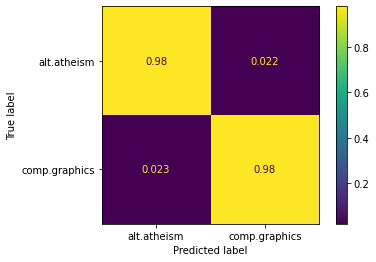

In [29]:
from sklearn import metrics

preds = clf.predict(X_tfidf_test)

print('Matriz de Confusao:')
print(metrics.plot_confusion_matrix(clf, X_tfidf_test, twenty_test.target, 
                                    display_labels=twenty_test.target_names,
                                    normalize='true'))

print(metrics.classification_report(twenty_test.target, preds,
                                    target_names=twenty_test.target_names))